In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [15]:
file_path = r"C:\Users\Dattaraj\Desktop\ML\admission - admission.csv"
df = pd.read_csv(file_path)



In [17]:
print("Summary Statistics:\n", df.describe())


Summary Statistics:
        Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

             LOR        CGPA    Research  Chance of Admit  
count  500.00000  500.000000  500.000000        500.00000  
mean     3.48400    8.576440    0.560000          0.72174  
std      0.92545    0.604813    0.496884          0.14114  
min      1.00000    6.800000    0.000000     

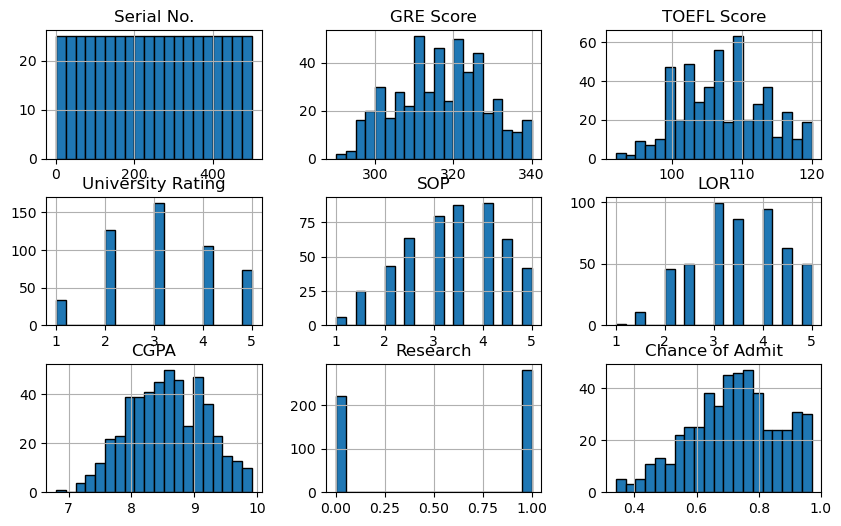

Missing values: 0
Duplicate rows: 0


In [19]:
# Plot histograms
df.hist(figsize=(10, 6), bins=20, edgecolor='black')
plt.show()

# Check missing values & duplicates
print("Missing values:", df.isnull().sum().sum())
print("Duplicate rows:", df.duplicated().sum())


In [21]:
# Convert 'Chance of Admit' to binary (0 or 1 based on 0.75 threshold)
df["Admit"] = (df["Chance of Admit"] >= 0.75).astype(int)
X = df.drop(columns=["Serial No.", "Chance of Admit", "Admit"])
y = df["Admit"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.89        64
           1       0.76      0.89      0.82        36

    accuracy                           0.86       100
   macro avg       0.85      0.87      0.85       100
weighted avg       0.87      0.86      0.86       100

